In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

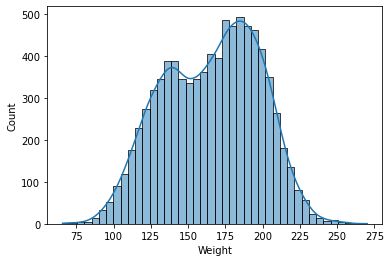

In [8]:
sns.histplot(df['Weight'], kde=True)

In [9]:
mean_value = df['Weight'].mean()  #calculate mean value
mean_value

165.63273532667586

In [10]:
std_value = df['Weight'].std() #Calculate Standard Deviation
std_value

32.04392221721549

In [11]:
std_plus_3 = mean_value + (3 * std_value ) 

In [12]:
std_plus_3

261.7645019783223

In [13]:
neg_std_3 = mean_value - (3 * std_value )  #you can use 2.5 std to more clean
neg_std_3

69.50096867502938

In [14]:
df[df['Weight'] > std_plus_3]   #Outlier

Gender     Height      Weight
2014   Male  78.998742  269.989698

In [15]:
df[df['Weight'] < neg_std_3]  #Outlier

Gender     Height    Weight
151     Male  65.350411  65.78000
160     Male  64.333648  68.64000
5360  Female  55.668202  68.98253

In [16]:
merge_outliers = df[(df['Weight'] > std_plus_3) | (df['Weight'] < neg_std_3)]   # Merge two type of outlier

In [17]:
merge_outliers

Gender     Height      Weight
151     Male  65.350411   65.780000
160     Male  64.333648   68.640000
2014    Male  78.998742  269.989698
5360  Female  55.668202   68.982530

In [18]:
merge_outliers.shape

(4, 3)

In [19]:
remove_out_columns = df[(df['Weight'] < std_plus_3) & (df['Weight'] > neg_std_3)]  #drop all outliers

In [20]:
remove_out_columns

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8551 rows x 3 columns]

In [21]:
remove_out_columns.shape

(8551, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

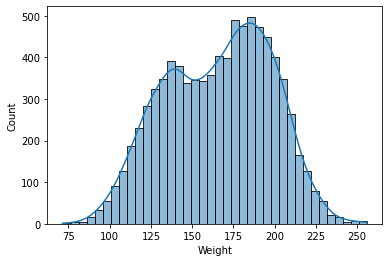

In [22]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [23]:
#One Hot Encoding
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  #true means it will drop

In [24]:
dummy_variables

Male
0        1
1        1
2        1
3        1
4        1
...    ...
8550     0
8551     0
8552     0
8553     0
8554     0

[8551 rows x 1 columns]

In [25]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [26]:
new_df

Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
8550  60.483946  110.565497
8551  63.423372  129.921671
8552  65.584057  155.942671
8553  67.429971  151.678405
8554  60.921791  131.253738

[8551 rows x 2 columns]

In [27]:
df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame

In [28]:
df.head()

Height      Weight  Male
0  73.847017  241.893563     1
1  68.781904  162.310473     1
2  74.110105  212.740856     1
3  71.730978  220.042470     1
4  69.881796  206.349801     1

In [29]:
df.tail()

Height      Weight  Male
8550  60.483946  110.565497     0
8551  63.423372  129.921671     0
8552  65.584057  155.942671     0
8553  67.429971  151.678405     0
8554  60.921791  131.253738     0

In [30]:
x = df.drop('Height', axis=1)

In [31]:
y = df['Height']

In [32]:
x.head()

Weight  Male
0  241.893563     1
1  162.310473     1
2  212.740856     1
3  220.042470     1
4  206.349801     1

In [33]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [34]:

from sklearn.model_selection import train_test_split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [36]:
xtrain.shape

(5985, 2)

In [37]:
xtest.shape

(2566, 2)

In [38]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [39]:
reg  = LinearRegression() #create linear reg object

In [40]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [41]:
reg.coef_   # coefficient in linear regression

array([ 0.1234468 , -0.98660239])

In [42]:
reg.intercept_  # value of intercept

46.9312820412305

In [43]:
reg.predict(xtest)

array([65.72126577, 64.78641032, 67.79522705, ..., 69.00211426,
       68.04828346, 70.28684906])

In [44]:
reg.predict(xtest).shape

(2566,)

In [45]:
pred = reg.predict(xtest)

In [46]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mean_squared_error(ytest, pred)

2.11452086347019

In [48]:
r2_score(ytest,pred)

0.8578364407986426

In [49]:
#Model Accuracy is 85.78%